### Imports

In [1]:
# Initial imports
import numpy as np
import pandas as pd

In [2]:
# Load the data
data = pd.read_csv('diabetes.csv')

In [3]:
# Check the head and tail
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# DiabetesPedigreeFunction: A function that represents how likely they are
# to get the disease by extrapolating from their ancestor’s history

In [ ]:
# Outcome: 0 if negative 1 if positive for diabetes

In [5]:
# Let's see the shape of our data
data.shape

(768, 9)

In [6]:
# Checking for null values
data.isnull().sum() # No missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# No missing values, but some lines have zero as the value for multiple features
# and this is physiologically impossible

### Handle the zero values

In [ ]:
# Check and replace this values, by median imputation (there are more robust or effective ways)

In [7]:
# The Insulin column
data[(data['Insulin']==0)]['Insulin'].value_counts()

0    374
Name: Insulin, dtype: int64

In [8]:
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())

In [9]:
# The BMI column
data[(data['BMI']==0)]['BMI'].value_counts()

0.0    11
Name: BMI, dtype: int64

In [10]:
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())

In [11]:
# The Glucose column
data[(data['Glucose']==0)]['Glucose'].value_counts()

0    5
Name: Glucose, dtype: int64

In [12]:
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())

In [13]:
# The Blood Pressure column
data[(data['BloodPressure']==0)]['BloodPressure'].value_counts()

0    35
Name: BloodPressure, dtype: int64

In [14]:
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())

In [15]:
# And the Thickness column
data[data['SkinThickness']==0]['SkinThickness'].value_counts()

0    227
Name: SkinThickness, dtype: int64

In [16]:
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

In [ ]:
# Pregnancies is a column that is acceptable a zero value

In [17]:
# Checking head again
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [ ]:
# Limitation, our data is composed only by women (the pregnancy column)
# Our predictions don't fit in men population

### Continue...

In [18]:
# Statistical resume
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


### Exploratory Data Analysis

In [19]:
# More imports
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

<AxesSubplot:title={'center':'Diabetes Prevalence'}, xlabel='Outcome', ylabel='count'>

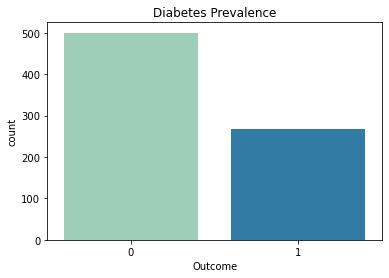

In [20]:
# Checking the distribution of the target variable
plt.title('Diabetes Prevalence')
sns.countplot(data['Outcome'], palette='YlGnBu')

In [21]:
data['Outcome'].value_counts() # Unbalaced data

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:title={'center':'Heatmap of Correlations'}>

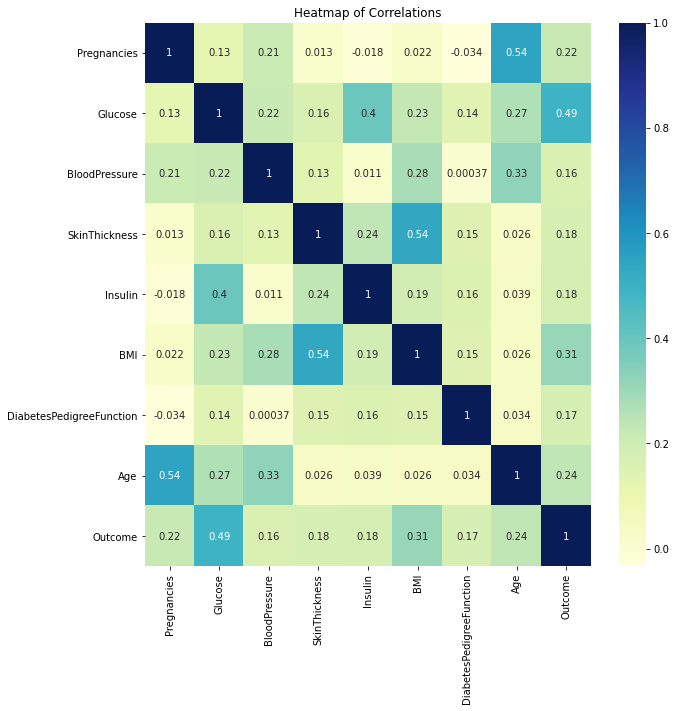

In [22]:
plt.figure(figsize=(10,10))
plt.title('Heatmap of Correlations')
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)

In [23]:
# Some features have low to moderate correlation with the target

### Let's explore outliers

<AxesSubplot:>

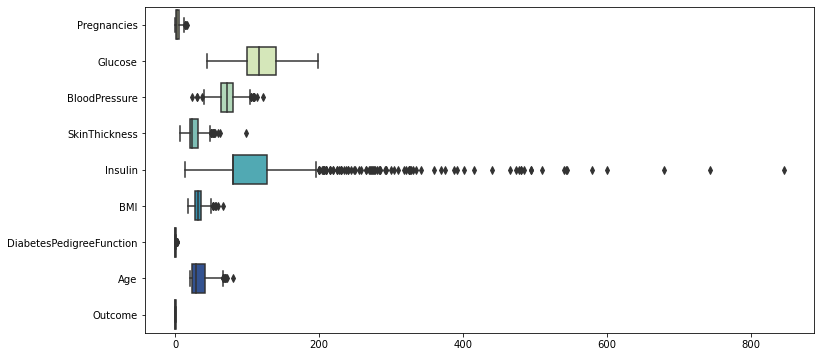

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, orient='h', palette='YlGnBu')

In [ ]:
# Checking for outliers
Q1 = data['Insulin'].quantile(0.25)
Q3 = data['Insulin'].quantile(0.75)
IQR = Q3-Q1

# Calculating the lower and upper whiskers
lower = Q1-1.5*IQR
upper = Q3-1.5*IQR

In [ ]:
data = data[data['Insulin'] < upper]

# Check the head again
data.head()

### Modeling and splitting the data

In [25]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Checking the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

### SMOTE

In [28]:
# for unbalanced data, we use SMOTE, this gives the model more examples of the target variable
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority',random_state=42)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [29]:
X_sm.shape, y_sm.shape  #checking the shape after oversampling

((698, 8), (698,))

### Create a model

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
# Train the model
model = RandomForestClassifier(n_estimators=150, max_depth=9, min_samples_leaf=7,
                               min_samples_split=7, random_state=42)
model.fit(X_sm, y_sm)

RandomForestClassifier(max_depth=9, min_samples_leaf=7, min_samples_split=7,
                       n_estimators=150, random_state=42)

In [32]:
# Make predictions
predictions = model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, roc_auc_score

In [34]:
# Evaluate the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81       151
           1       0.62      0.81      0.71        80

    accuracy                           0.77       231
   macro avg       0.75      0.78      0.76       231
weighted avg       0.79      0.77      0.77       231



In [38]:
print('The ROC_AUC score:',roc_auc_score(predictions, y_test))

The ROC_AUC score: 0.7534448818897638


### Conclusion

In [ ]:
# We have a good model, we reached over 80% in the recall score
# It shows us that our model is very good for identifying diabetes!!

In [ ]:
### Saving the model

In [39]:
import joblib

In [40]:
filename = 'model.sav'

In [41]:
joblib.dump(model,filename)

['model.sav']